# Importing Libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
import nltk
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [144]:
df = pd.read_csv("spam.csv", encoding='latin1')

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Exploration and Cleaning

In [145]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [147]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [148]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [149]:
df.columns = ["type", "text"]

In [150]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


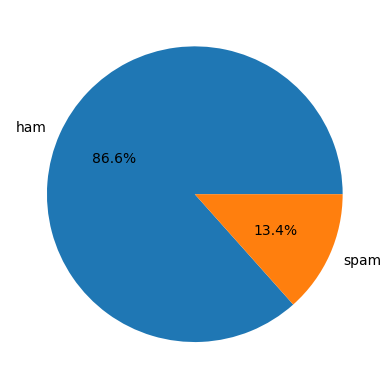

In [151]:
plt.pie(df["type"].value_counts(), labels=['ham', 'spam'], autopct = '%1.1f%%')
plt.show()

# Data Preprocessing
## Tokenization + Removing Stop Words

In [152]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
#func for processing text (lowercase, stopwords, punctuation etc)
def text_process(txt):
    stop_words = stopwords.words('english')
    txt = txt.lower()

    no_punctuation = ''.join([char for char in txt if char not in string.punctuation])

    #TOKENIZATION +REMOVING STOP WORDS
    tokens = no_punctuation.split()
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)


df['processed text'] = df['text'].apply(text_process)

In [154]:
df

,type,text,processed text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å£750 pound prize...
5568,ham,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


## Vectorization

In [155]:
tfidf = TfidfVectorizer()

In [156]:
X = tfidf.fit_transform(df['processed text'])

In [157]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47254 stored elements and shape (5572, 9376)>

## Encoding Spam/Ham Labels

In [158]:
le = LabelEncoder()
df["type"] = le.fit_transform(df['type'])

In [159]:
df

,type,text,processed text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å£750 pound prize...
5568,0,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


# Setting I/P O/P

In [160]:
y = df["type"]

y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5572, dtype: int64

In [161]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47254 stored elements and shape (5572, 9376)>

# Data Splitting

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [163]:
y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: type, Length: 4457, dtype: int64

# Model Training

## Naive Bayes

In [164]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [165]:
nb_predict = nb.predict(X_test)

In [166]:
precision_score(y_test, nb_predict)

1.0

In [167]:
recall_score(y_test, nb_predict)

0.7466666666666667

In [168]:
f1_score(y_test, nb_predict)

0.8549618320610687

In [169]:
roc_auc_score(y_test, nb_predict)

np.float64(0.8733333333333333)

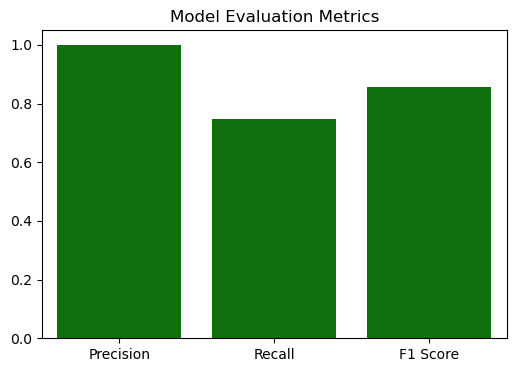

In [189]:
nb_metrics = {
    'Precision': precision_score(y_test, nb_predict),
    'Recall': recall_score(y_test, nb_predict),
    'F1 Score': f1_score(y_test, nb_predict)
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(nb_metrics.keys()), y=list(nb_metrics.values()), color='green')
plt.title('Model Evaluation Metrics')
plt.show()

## SVM

In [171]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [172]:
svm_predict = svm.predict(X_test)

In [173]:
precision_score(y_test, svm_predict)

0.9767441860465116

In [174]:
recall_score(y_test, svm_predict)

0.84

In [175]:
f1_score(y_test, svm_predict)

0.9032258064516129

In [176]:
roc_auc_score(y_test, svm_predict)

np.float64(0.9184455958549222)

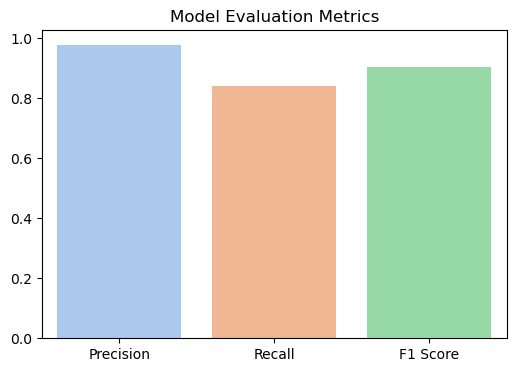

In [192]:
svm_metrics = {
    'Precision': precision_score(y_test, svm_predict),
    'Recall': recall_score(y_test, svm_predict),
    'F1 Score': f1_score(y_test, svm_predict)
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(svm_metrics.keys()), y=list(svm_metrics.values()), palette='pastel')
plt.title('Model Evaluation Metrics')
plt.show()

# Further Evaluation
## mini-df

In [ ]:
mini_test_df = pd.DataFrame({
    'text': [
        "Congratulations! You’ve won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.",
        "Hey, are we still meeting for lunch tmrw??? Lets have fun!!",
        "URGENT! Your account has been compromised. Click here to secure it immediately.",
        "Reminder: Your appointment with the dentist is tomorrow at 3 pm. Dont be late!",
        "Limited-time offer! Buy one, get one free! Shop now!"
    ]
})